In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
import pandas as pd 

In [ ]:
crime_data = pd.read_csv("/content/caw1.csv")

In [ ]:
crime_data.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Andhra Pradesh,RAPE,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341
1,Arunachal Pradesh,RAPE,33,38,31,42,35,37,48,42,59,47,42,46
2,Assam,RAPE,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716
3,Bihar,RAPE,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927
4,Chhattisgarh,RAPE,959,992,898,969,990,995,982,978,976,1012,1053,1034


In [ ]:
crime_data.isnull().sum()

STATE/UT      0
CRIME HEAD    0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
dtype: int64

In [ ]:
years_title = [str(i) for i in range(2001, 2013)]

In [ ]:
India_states = crime_data['STATE/UT'].unique()
India_states = India_states[:-4]
India_states

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu'], dtype=object)

In [ ]:
Case_types = crime_data['CRIME HEAD'].unique()
Case_types = Case_types [:-1]
Case_types

array(['RAPE', 'KIDNAPPING & ABDUCTION', 'DOWRY DEATH',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO THE MODESTY OF WOMEN',
       'CRUELTY BY HUSBAND OR RELATIVES',
       'IMMORAL TRAFFIC(PREVENTION)ACT'], dtype=object)

<ipython-input-239-b0124b94d67b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(12,8), dpi= 80, facecolor='w', edgecolor='k')


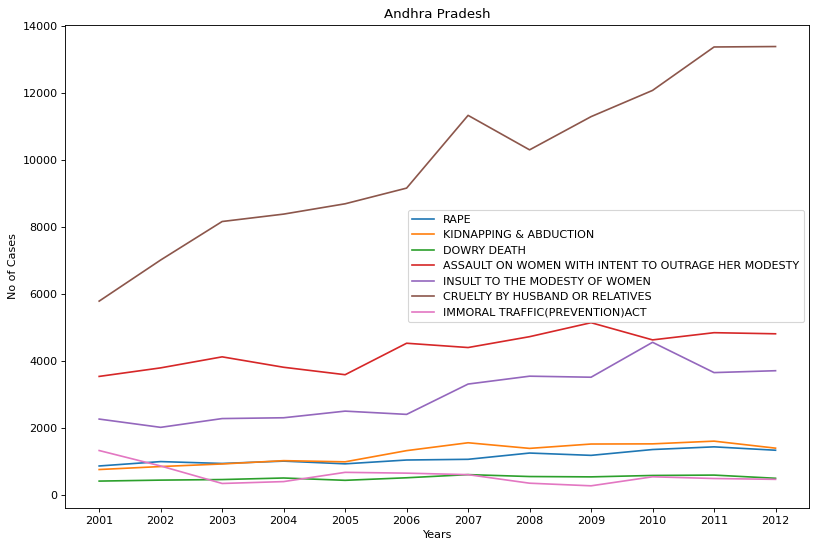

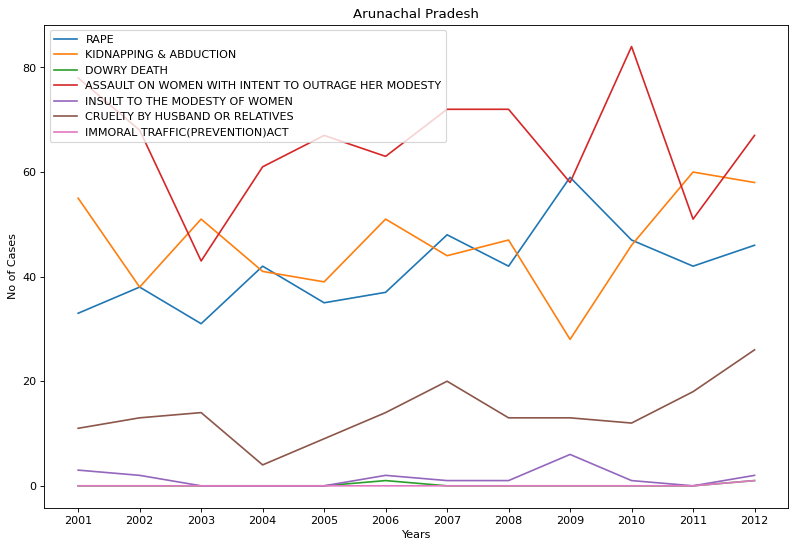

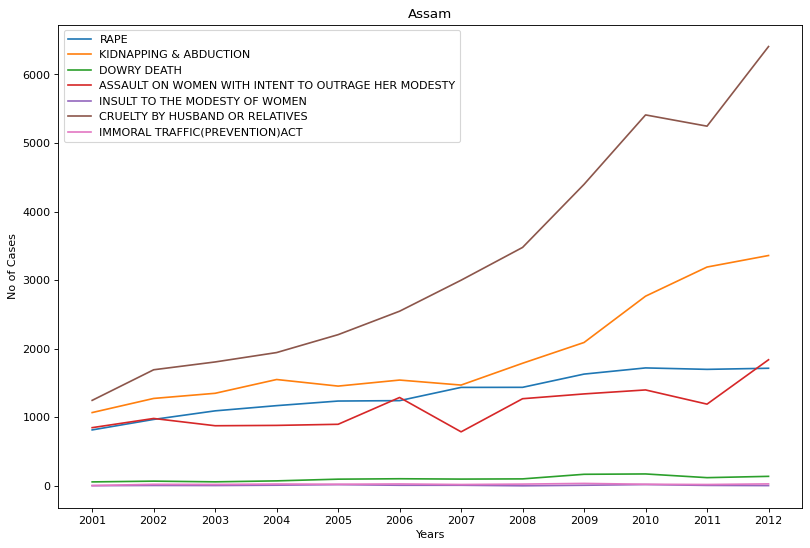

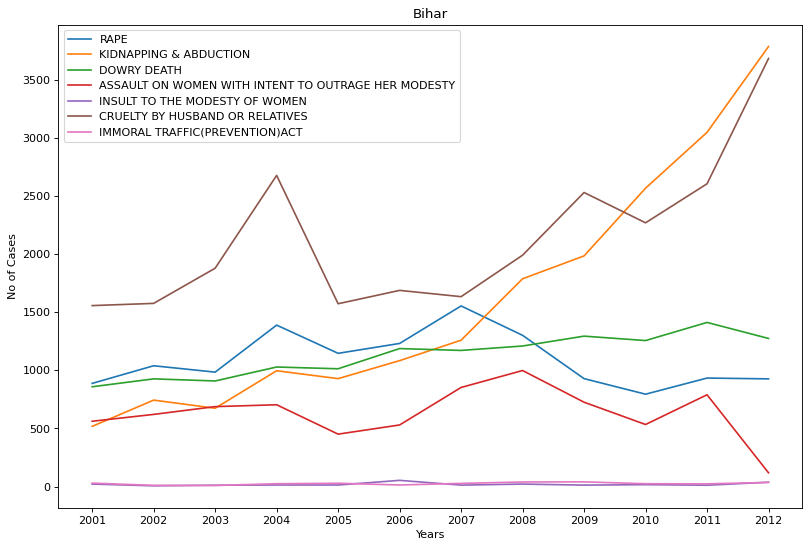

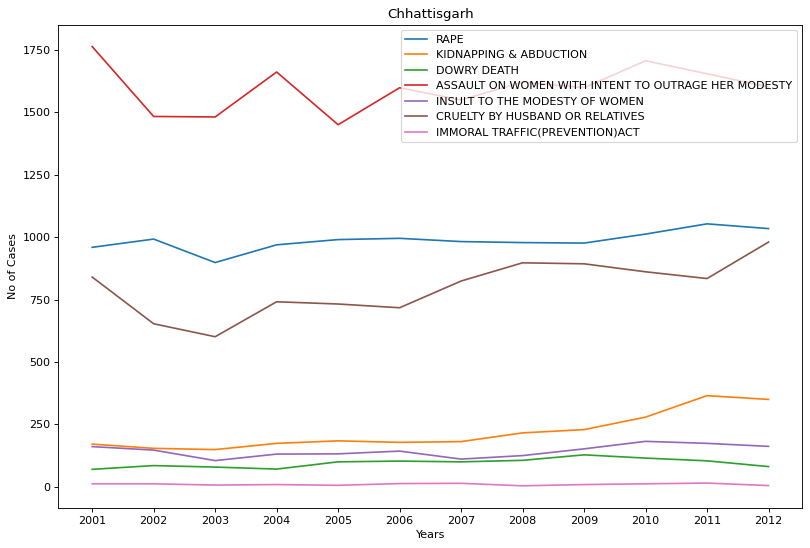

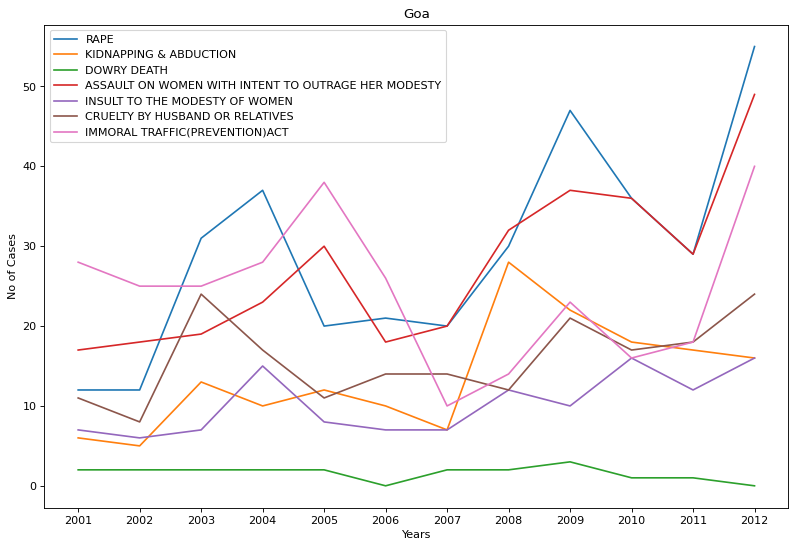

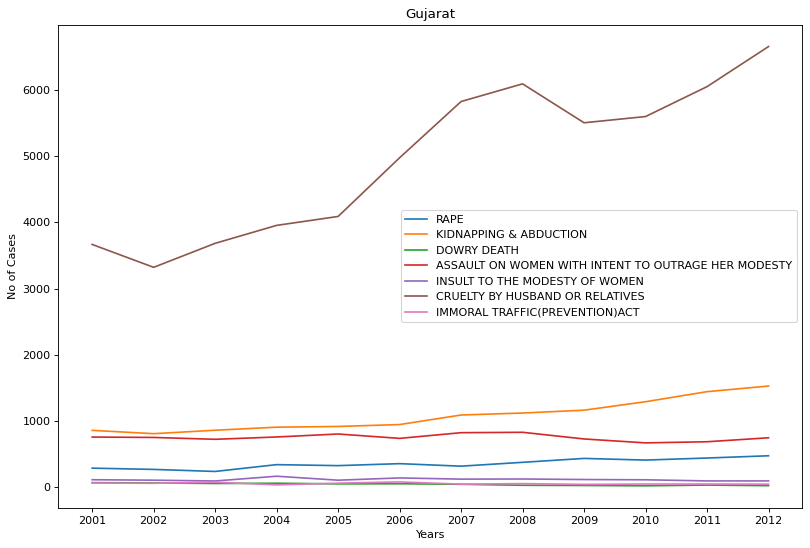

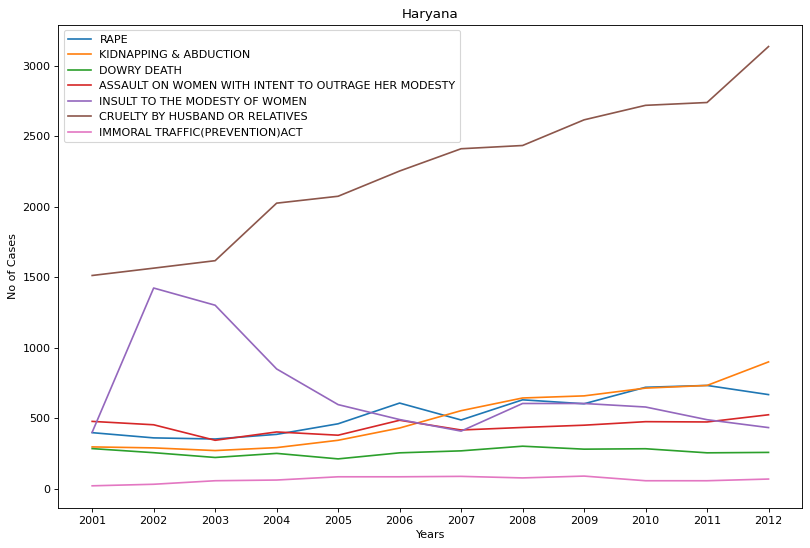

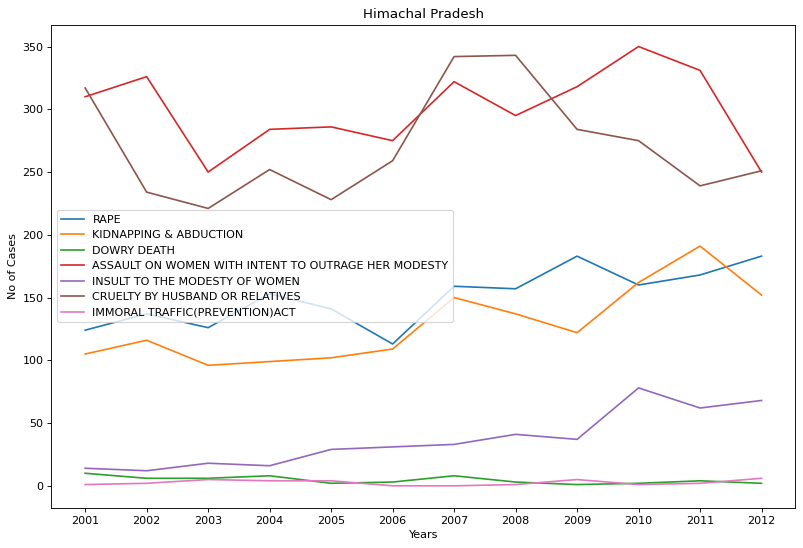

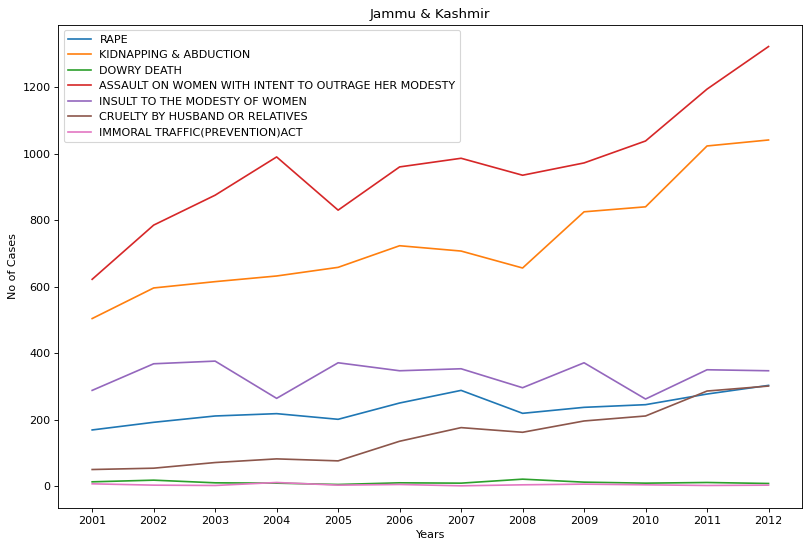

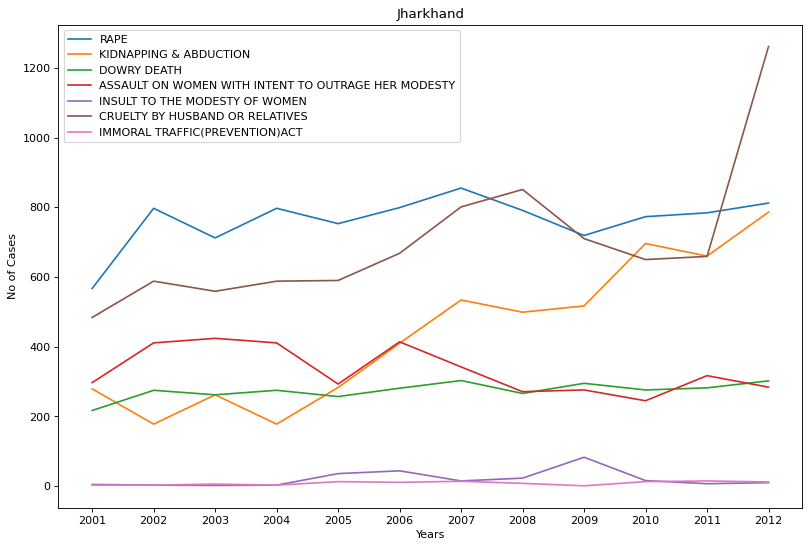

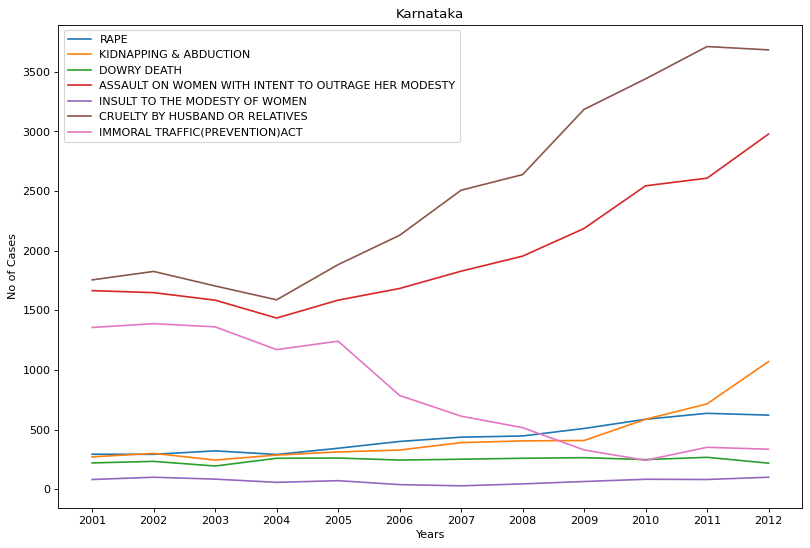

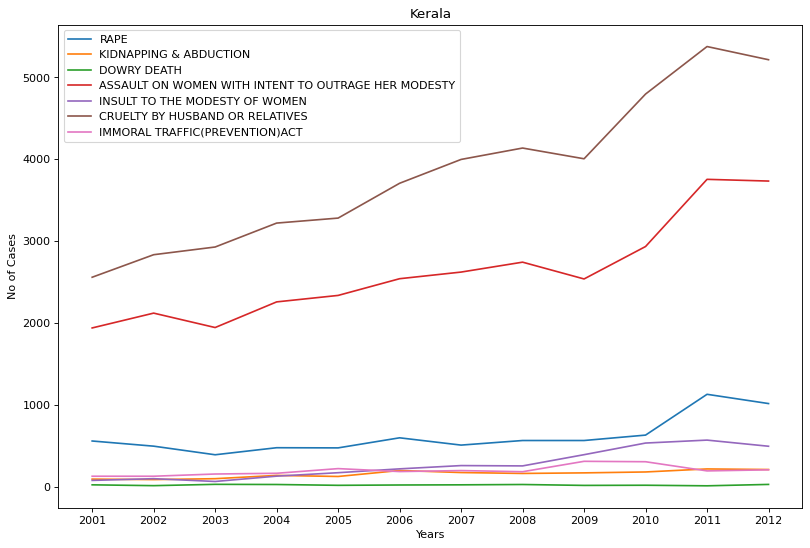

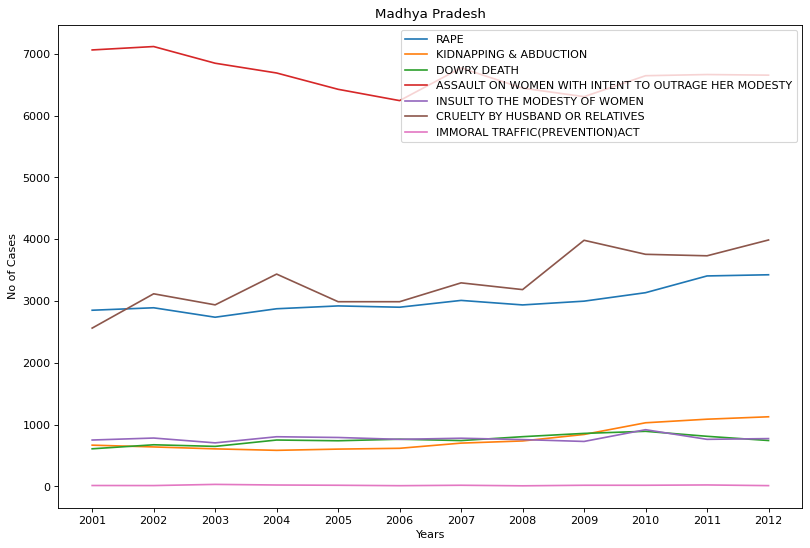

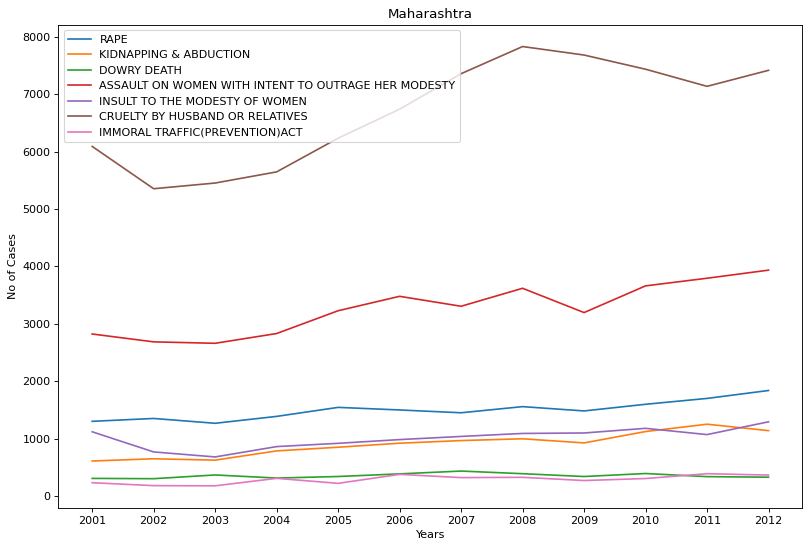

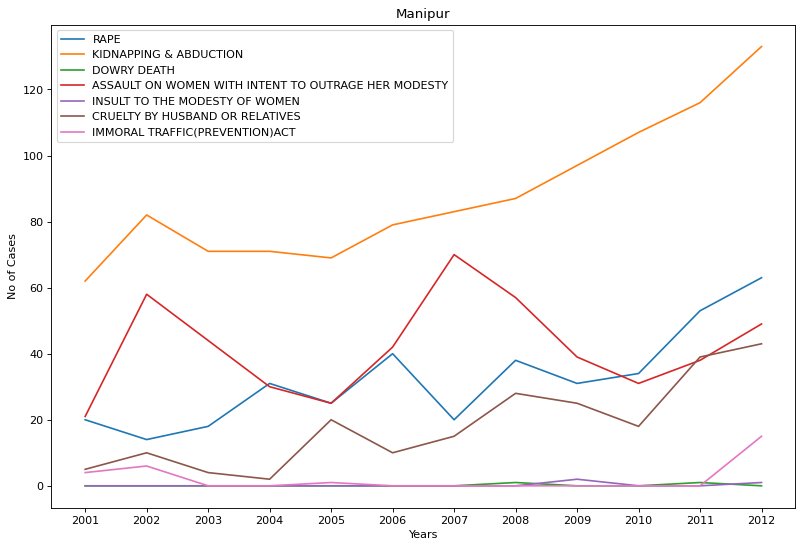

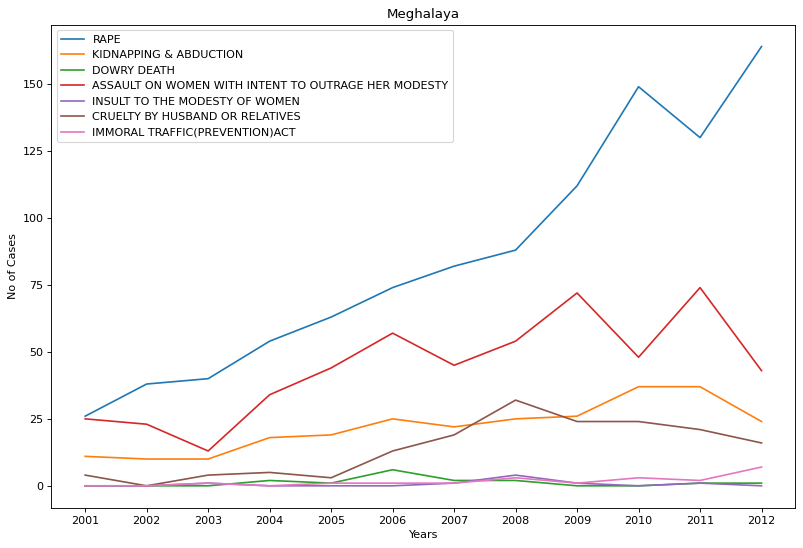

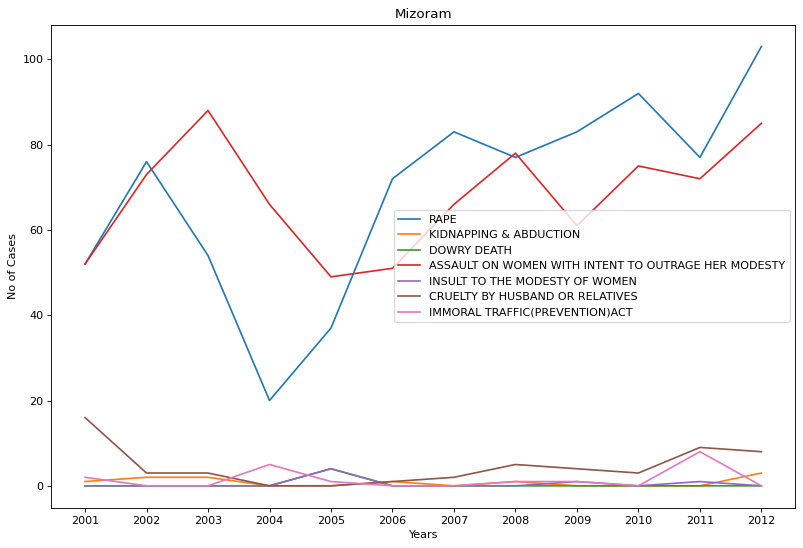

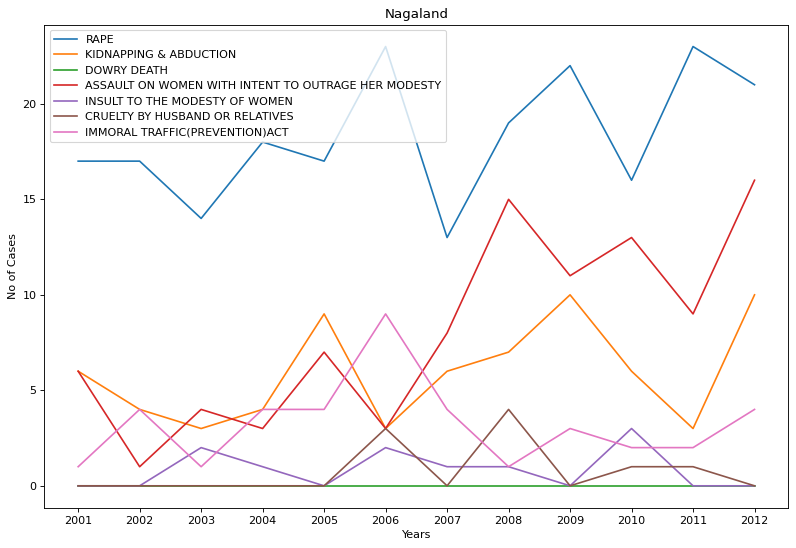

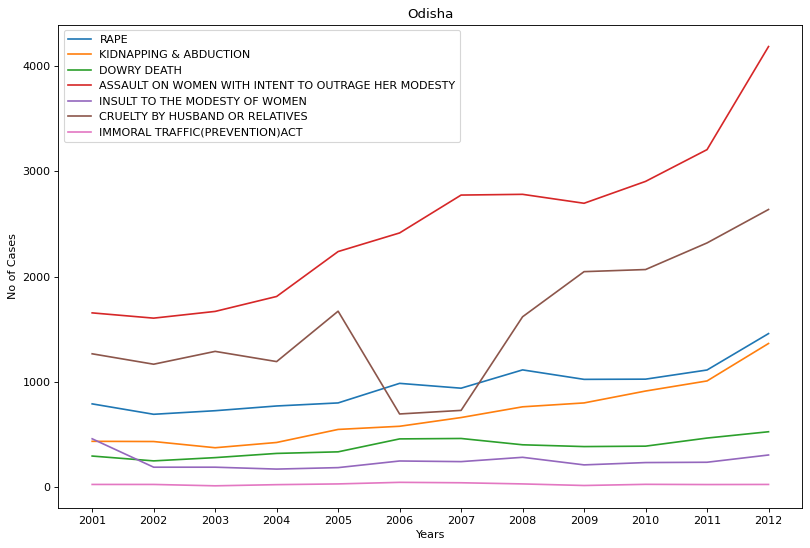

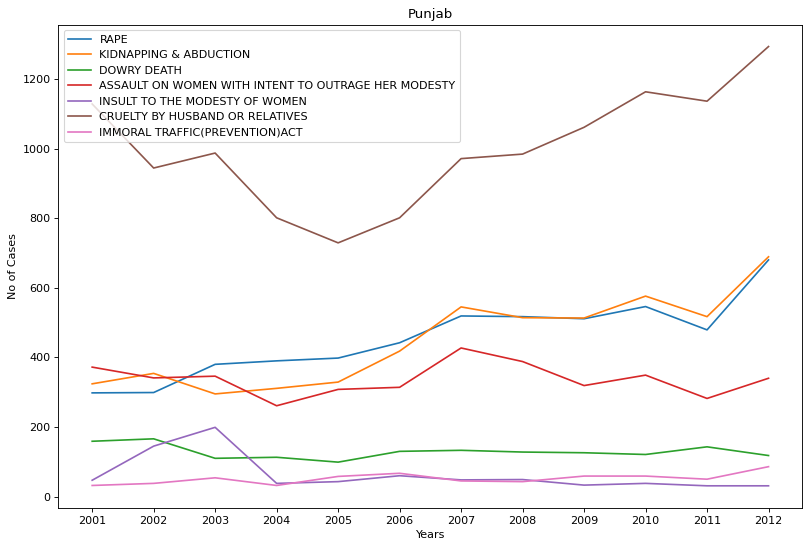

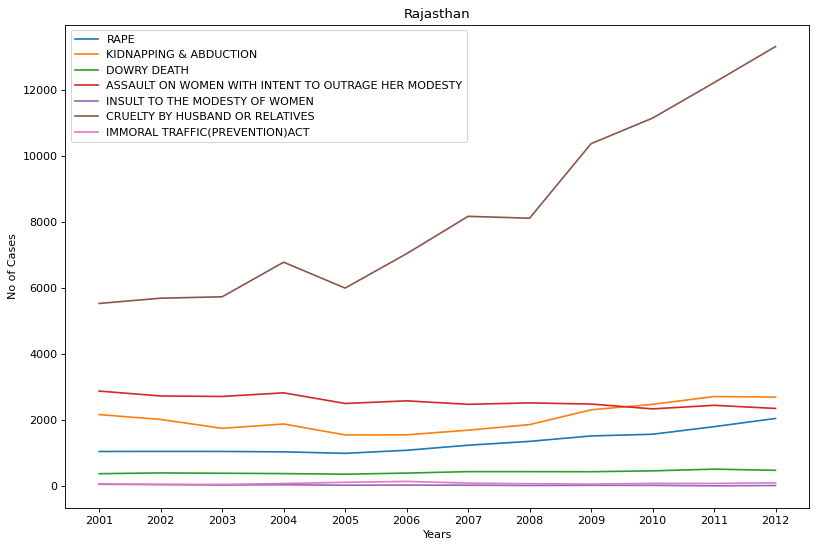

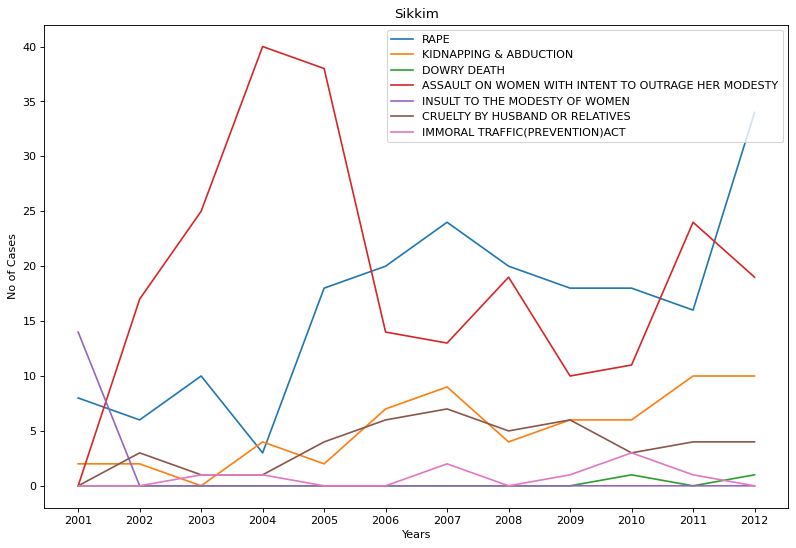

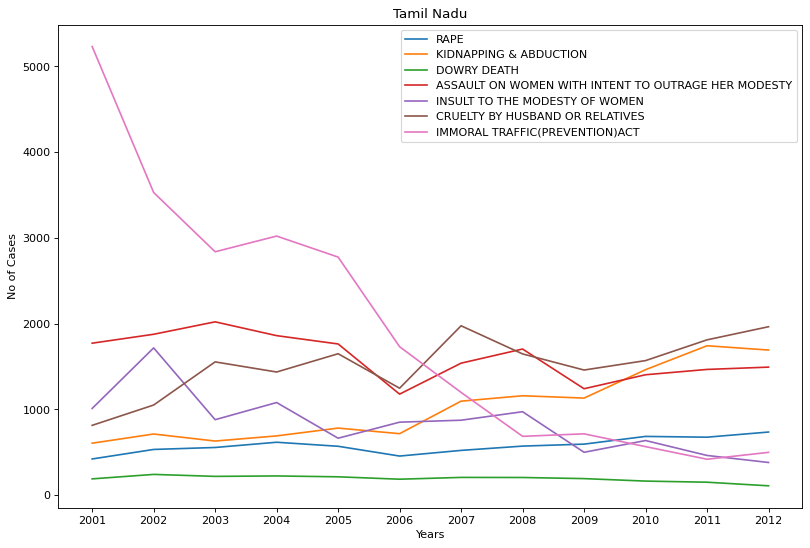

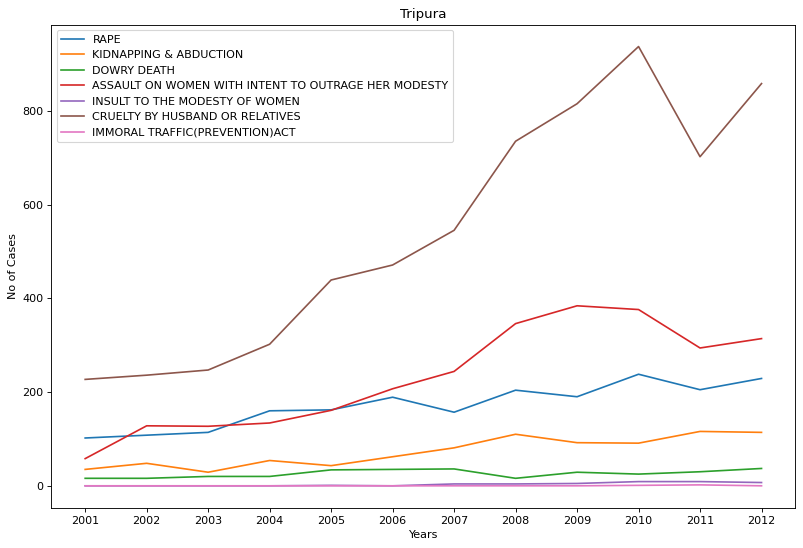

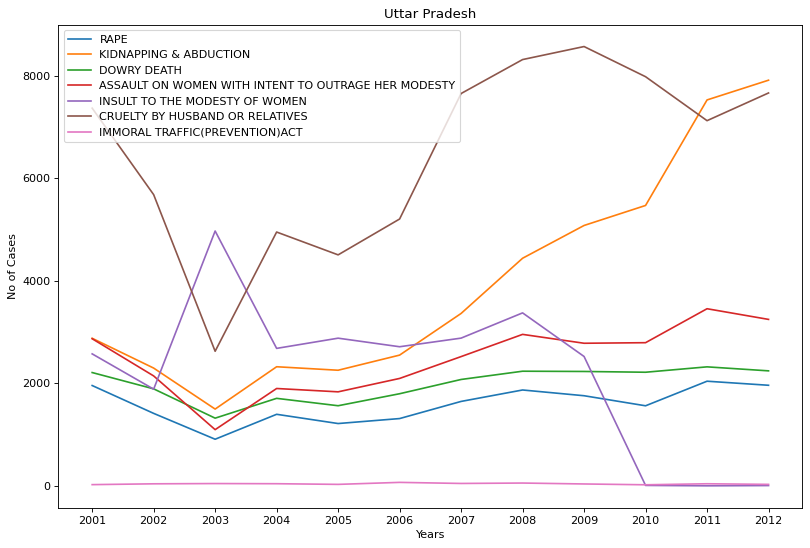

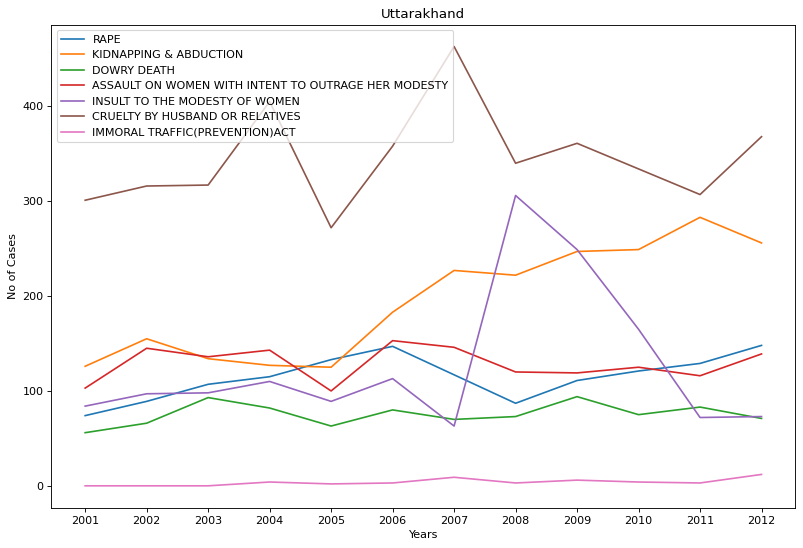

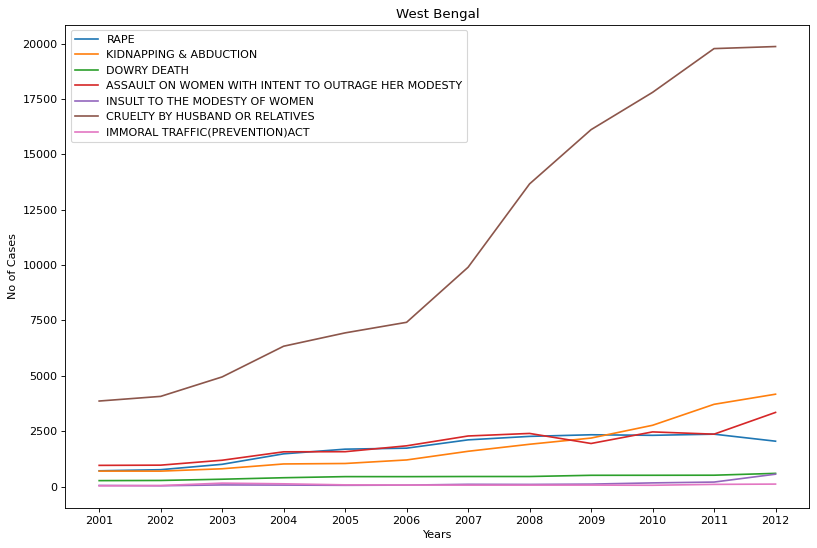

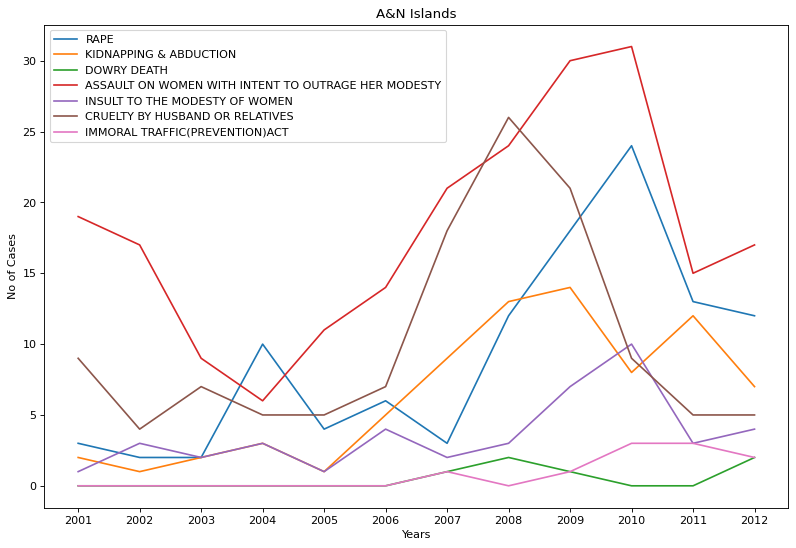

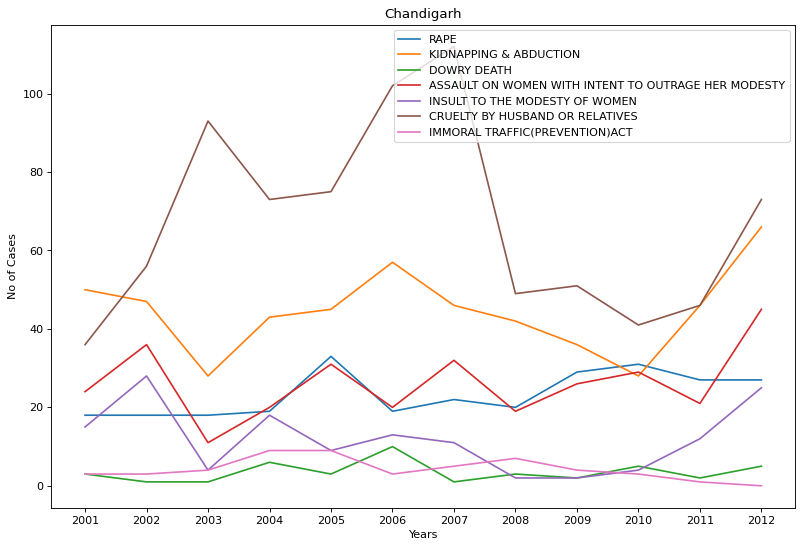

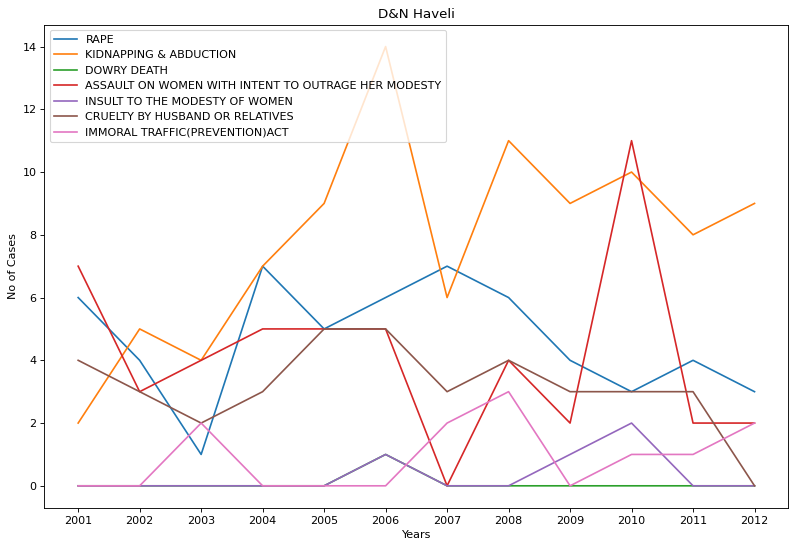

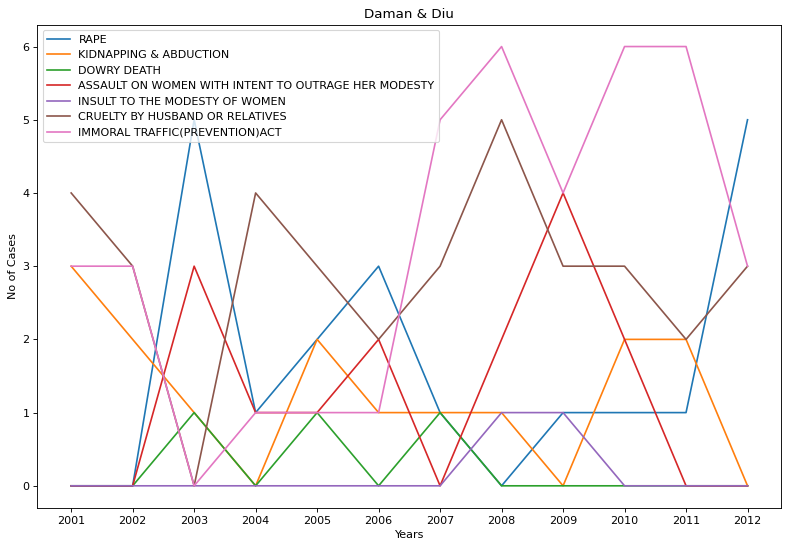

In [ ]:
for state in India_states:
  fig=plt.figure(figsize=(12,8), dpi= 80, facecolor='w', edgecolor='k')
  plt.title(state)
  plt.xlabel('Years')
  plt.ylabel('No of Cases')

  for case in Case_types:
    temp_df = crime_data[(crime_data['STATE/UT'] == state) & (crime_data['CRIME HEAD'] == case)]
    N_cases = [temp_df[c].values[0] for c in years_title]
    plt.plot(years_title, N_cases)
    plt.legend(Case_types)

In [ ]:
print('Data set:')
for col_name in crime_data.columns:
  if crime_data[col_name].dtypes == 'object' :
    unique_cat = len(crime_data[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
    
print()

Data set:
Feature 'STATE/UT' has 36 categories
Feature 'CRIME HEAD' has 8 categories



In [ ]:
from sklearn import preprocessing 
lab = preprocessing.LabelEncoder()

crime_data['CRIME HEAD'] = lab.fit_transform(crime_data['CRIME HEAD'])
crime_data.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Andhra Pradesh,7,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341
1,Arunachal Pradesh,7,33,38,31,42,35,37,48,42,59,47,42,46
2,Assam,7,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716
3,Bihar,7,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927
4,Chhattisgarh,7,959,992,898,969,990,995,982,978,976,1012,1053,1034


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)

kmeans.fit(crime_data.iloc[:,1:])

KMeans(n_clusters=9)

KMeans(n_clusters=9)

In [ ]:
kmeans.cluster_centers_

array([[3.59624413e+00, 7.84507042e+01, 8.25727700e+01, 7.98497653e+01,
        8.39859155e+01, 8.59154930e+01, 9.53615023e+01, 1.00751174e+02,
        1.00723005e+02, 1.01629108e+02, 1.08000000e+02, 1.11826291e+02,
        1.17849765e+02],
       [0.00000000e+00, 3.41240000e+04, 3.39430000e+04, 3.29390000e+04,
        3.45670000e+04, 3.41750000e+04, 3.66170000e+04, 3.87340000e+04,
        4.04130000e+04, 3.87110000e+04, 4.06130000e+04, 4.29680000e+04,
        4.53510000e+04],
       [1.00000000e+00, 4.91700000e+04, 4.92370000e+04, 5.07030000e+04,
        5.81210000e+04, 5.83190000e+04, 6.31280000e+04, 7.59300000e+04,
        8.13440000e+04, 8.95460000e+04, 9.40410000e+04, 9.91350000e+04,
        1.06527000e+05],
       [1.00000000e+00, 3.85900000e+03, 4.06900000e+03, 4.94800000e+03,
        6.33400000e+03, 6.93600000e+03, 7.41400000e+03, 9.90000000e+03,
        1.36630000e+04, 1.61120000e+04, 1.77960000e+04, 1.97720000e+04,
        1.98650000e+04],
       [1.57142857e+00, 6.91971429e+

In [ ]:
labels = kmeans.labels_
labels

array([8, 0, 8, 8, 8, 0, 0, 0, 0, 0, 8, 0, 0, 6, 8, 0, 0, 0, 0, 8, 0, 8,
       0, 0, 0, 8, 0, 8, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0, 8, 8, 0, 0, 8, 0,
       0, 8, 0, 0, 0, 8, 8, 0, 0, 0, 0, 8, 0, 8, 0, 8, 0, 6, 0, 8, 0, 0,
       0, 0, 8, 0, 0, 5, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 0,
       8, 0, 8, 0, 8, 0, 0, 8, 0, 8, 6, 4, 6, 0, 0, 0, 0, 6, 0, 6, 0, 8,
       0, 6, 0, 8, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 6, 8, 8, 0, 6, 6, 0, 0, 8, 6, 6, 6, 4, 0, 0, 0,
       0, 8, 8, 4, 0, 8, 0, 4, 0, 3, 0, 0, 0, 0, 8, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 8], dtype=int32)

In [ ]:
import numpy as np

unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
dict_data

{0: 213, 1: 1, 2: 1, 3: 1, 4: 7, 5: 1, 6: 16, 7: 1, 8: 47}

In [ ]:
crime_data["cluster"]= kmeans.labels_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


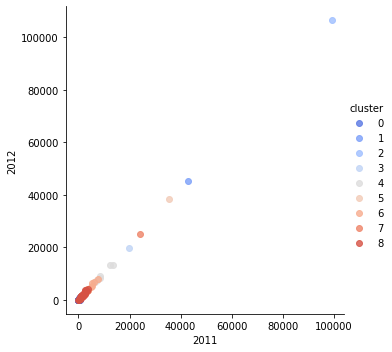

In [ ]:
import seaborn as sns 
sns.lmplot('2011', '2012', data=crime_data, hue = 'cluster', palette = 'coolwarm', size=5, aspect = 1, fit_reg = False)

In [ ]:
# inertia is the sum of squared error for each cluster.
# the smaller the inertia the denser the cluster (closer together all the points are)

kmeans.inertia_

890775786.2468833

In [ ]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=9)>

In [ ]:
crime_data

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cluster
0,Andhra Pradesh,7,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341,8
1,Arunachal Pradesh,7,33,38,31,42,35,37,48,42,59,47,42,46,0
2,Assam,7,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716,8
3,Bihar,7,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927,8
4,Chhattisgarh,7,959,992,898,969,990,995,982,978,976,1012,1053,1034,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Daman & Diu,4,0,0,0,0,0,0,0,0,0,0,0,0,0
284,Delhi UT,4,1,0,0,0,1,1,0,0,0,0,1,0,0
285,Lakshadweep,4,0,0,0,0,0,0,0,0,0,1,0,0,0
286,Puducherry,4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = crime_data.iloc[:,1:14]
y = crime_data.iloc[:, crime_data.columns=='cluster']

In [ ]:
print(x.head())
y.head()

   CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0           7   871  1002   946  1016   935  1049  1070  1257  1188  1362   
1           7    33    38    31    42    35    37    48    42    59    47   
2           7   817   970  1095  1171  1238  1244  1437  1438  1631  1721   
3           7   888  1040   985  1390  1147  1232  1555  1302   929   795   
4           7   959   992   898   969   990   995   982   978   976  1012   

   2011  2012  
0  1442  1341  
1    42    46  
2  1700  1716  
3   934   927  
4  1053  1034  


,cluster
0,8
1,0
2,8
3,8
4,8


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier (n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
print(y_pred)

from sklearn.metrics import accuracy_score, classification_report
acc1=accuracy_score(y_pred,y_test)
print(acc1)

clf=classification_report(y_pred, y_test)
print(clf)

[0 6 0 0 0 8 8 0 0 0 0 0 0 0 8 0 0 8 0 0 0 0 0 4 0 8 0 0 0 0 0 0 0 4 0 0 8
 0 0 0 0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 0 0]
0.9482758620689655
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           3       0.00      0.00      0.00         0
           4       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           8       0.88      0.88      0.88         8

    accuracy                           0.95        58
   macro avg       0.77      0.67      0.70        58
weighted avg       0.97      0.95      0.95        58



<ipython-input-254-211011271f60>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in la

In [ ]:
cust = [[7, 871, 1002, 946, 1016, 1049, 935, 1070, 1257, 1188, 1362, 1341, 1442]]

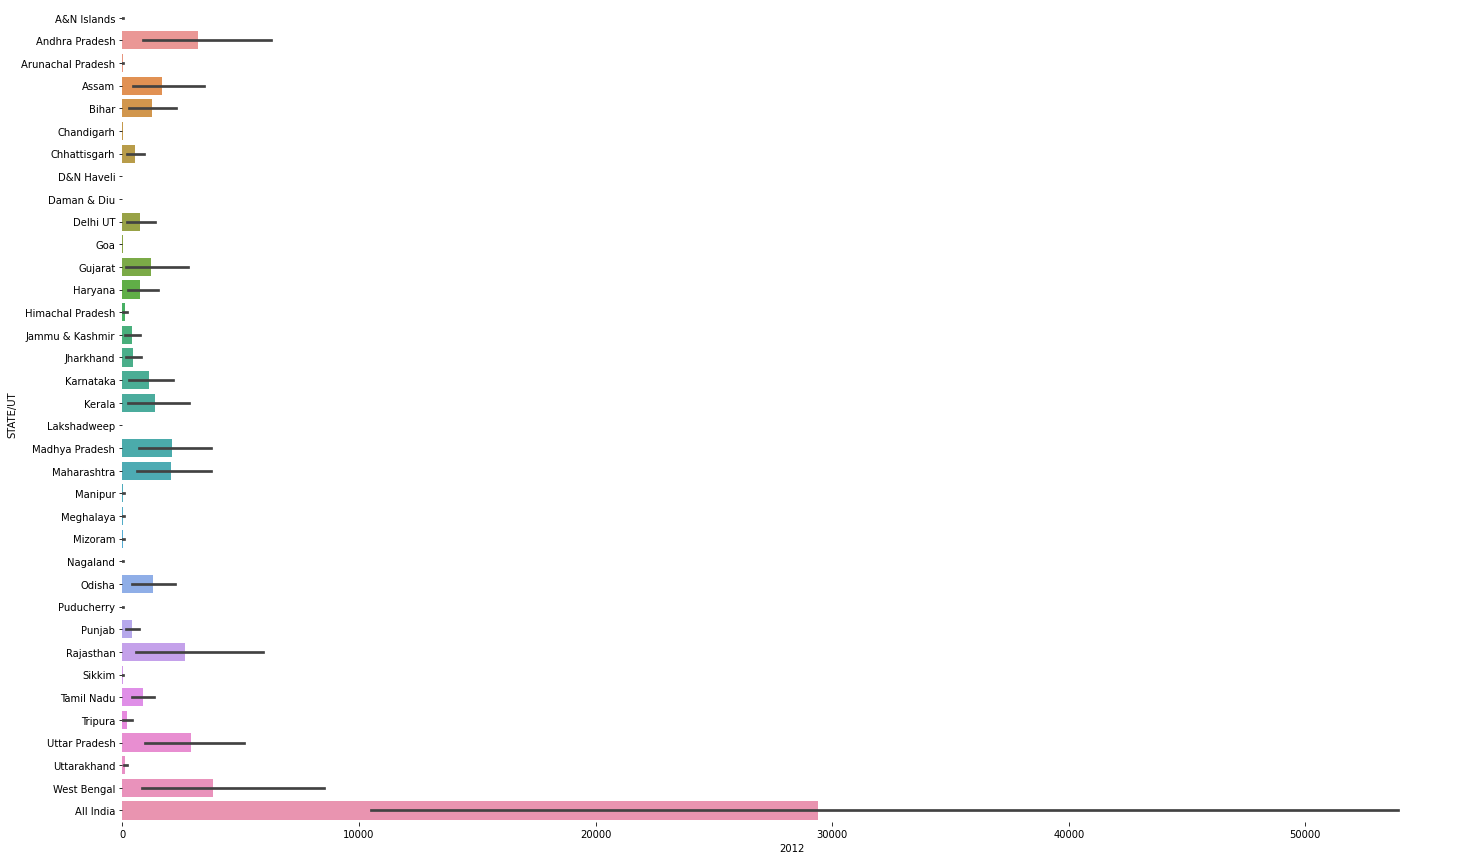

In [ ]:
f, ax = plt.subplots(figsize=(24,15))

stats = crime_data.sort_values(["cluster", "STATE/UT"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="STATE/UT", x="2012", data=stats)
sns.despine(left=True, bottom=True)

In [ ]:
X = crime_data.iloc[:,1:14]
Y = crime_data.iloc[:,crime_data.columns == 'cluster']

In [ ]:
print(X.head())
Y.head()

   CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0           7   871  1002   946  1016   935  1049  1070  1257  1188  1362   
1           7    33    38    31    42    35    37    48    42    59    47   
2           7   817   970  1095  1171  1238  1244  1437  1438  1631  1721   
3           7   888  1040   985  1390  1147  1232  1555  1302   929   795   
4           7   959   992   898   969   990   995   982   978   976  1012   

   2011  2012  
0  1442  1341  
1    42    46  
2  1700  1716  
3   934   927  
4  1053  1034  


,cluster
0,8
1,0
2,8
3,8
4,8


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
print(y_pred)

from sklearn.metrics import accuracy_score, classification_report
acc1=accuracy_score(y_pred,y_test)
print(acc1)

clf=classification_report(y_pred, y_test)
print(clf)

[0 6 0 0 0 8 8 0 0 0 0 0 0 0 8 0 0 8 0 0 0 0 0 4 0 8 0 0 0 0 0 0 0 4 0 0 8
 0 0 0 0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 0 0]
0.9482758620689655
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           3       0.00      0.00      0.00         0
           4       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           8       0.88      0.88      0.88         8

    accuracy                           0.95        58
   macro avg       0.77      0.67      0.70        58
weighted avg       0.97      0.95      0.95        58



<ipython-input-260-d68320257b96>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in la

In [ ]:
x_test

,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
55,6,434,432,373,423,547,577,660,762,799,912,1008,1364
182,1,1248,1694,1808,1945,2206,2548,3000,3478,4398,5410,5246,6407
92,2,159,166,110,113,99,130,133,128,126,121,143,118
208,1,9,4,7,5,5,7,18,26,21,9,5,5
278,4,0,0,0,0,0,0,0,0,0,0,0,0
45,6,504,596,615,632,658,723,707,656,825,840,1023,1041
111,0,562,621,688,704,451,530,853,999,726,534,790,118
240,3,0,0,0,0,0,0,0,0,0,1,2,0
15,7,20,14,18,31,25,40,20,38,31,34,53,63
22,7,8,6,10,3,18,20,24,20,18,18,16,34


In [ ]:
y_pred

array([0, 6, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 0,
       0, 4, 0, 8, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)
predic2 = lg.predict(x_test)
acc2 = accuracy_score(predic2, y_test)
print(acc2)

0.3620689655172414


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import svm
sv = svm.LinearSVC()
sv.fit(x_train, y_train)
predic3 = sv.predict(x_test)

acc3 = accuracy_score(predic3, y_test)
print(acc3)

clf3 = classification_report(predic3, y_test)
print(clf3)


0.6551724137931034
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        39
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.66        58
   macro avg       0.10      0.12      0.11        58
weighted avg       0.54      0.66      0.59        58



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

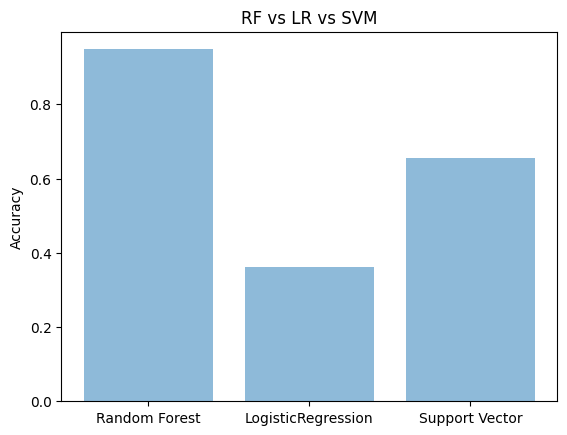

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
objects = ('Random Forest','LogisticRegression','Support Vector')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('RF vs LR vs SVM')

plt.show()


In [ ]:
import pickle
pickle.dump(random_forest, open('model.pkl', 'wb'))